In [2]:
import pandas as pd

In [5]:
data = pd.read_csv('Data\\project_data_cleaned.csv')

In [6]:
data

,Frequency_items,Potencial_Score,Longevity_months,Credit_factor,Relevance_criteria,Recency_in_weeks,Flaged,Promotional_percentage,Beer,Bottled_Water,...,Dairy,Fresh_Foods,Frozen_Foods,Fruit_Beverages,Pastry,Sodas,Toiletries,Veggies,Wines,Spent_Sum
0,38,-0.40,23.0,0.7,1.0,15,0.0,20.0,75,38,...,88,148,150.0,105,27,24,27,10,0,778.0
1,50,-0.30,24.0,0.7,1.0,10,0.0,36.0,46,58,...,90,134,26.0,20,31,0,2,18,2,448.0
2,48,1.60,32.0,0.7,1.0,20,0.0,0.0,39,57,...,89,39,0.0,25,32,17,33,26,0,374.0
3,46,-0.90,NaN,4.5,1.0,14,0.0,36.0,50,41,...,89,26,66.0,16,29,31,28,0,8,401.0
4,31,31.61,10.0,0.7,1.0,12,0.0,10.0,43,46,...,90,0,57.0,27,45,46,19,23,9,418.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123678,33,79.60,21.0,0.7,1.0,19,0.0,0.0,0,0,...,0,0,0.0,0,0,0,0,0,0,0.0
123679,37,0.30,NaN,0.7,1.0,13,0.0,16.0,0,0,...,0,0,0.0,0,0,0,0,0,0,0.0
123680,43,79.17,11.0,0.7,1.0,14,0.0,30.0,0,0,...,0,0,0.0,0,0,0,0,0,0,0.0
123681,75,33.31,31.0,0.7,1.0,21,0.0,0.0,0,0,...,0,0,0.0,0,0,0,0,0,0,0.0


In [7]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(data, linkage_method, cut_line=None):
    """
    Plot a dendrogram for hierarchical clustering.

    Args:
        data (numpy.ndarray or pandas.DataFrame): The input data for clustering.
        linkage_method (str): The linkage method used for clustering.
        cut_line (float, optional): The threshold value to cut the dendrogram. Defaults to None.

    Returns:
        None
    """
    # Fit the AgglomerativeClustering model
    model = AgglomerativeClustering(linkage=linkage_method, distance_threshold=0, n_clusters=None).fit(data)

    # Create the plot
    fig, ax = plt.subplots()
    plt.title('Hierarchical Clustering Dendrogram')

    # Create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # Leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    # Create the linkage matrix
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the dendrogram
    dendrogram(linkage_matrix, truncate_mode='level', p=50)

    # Add a cut line if provided
    if cut_line is not None:
        plt.axhline(y=cut_line, color='black', linestyle='-')

    # Display the plot
    plt.show()


In [9]:
data_mv = data.dropna()

In [10]:
data_mv

,Frequency_items,Potencial_Score,Longevity_months,Credit_factor,Relevance_criteria,Recency_in_weeks,Flaged,Promotional_percentage,Beer,Bottled_Water,...,Dairy,Fresh_Foods,Frozen_Foods,Fruit_Beverages,Pastry,Sodas,Toiletries,Veggies,Wines,Spent_Sum
0,38,-0.40,23.0,0.7,1.0,15,0.0,20.0,75,38,...,88,148,150.0,105,27,24,27,10,0,778.0
1,50,-0.30,24.0,0.7,1.0,10,0.0,36.0,46,58,...,90,134,26.0,20,31,0,2,18,2,448.0
2,48,1.60,32.0,0.7,1.0,20,0.0,0.0,39,57,...,89,39,0.0,25,32,17,33,26,0,374.0
4,31,31.61,10.0,0.7,1.0,12,0.0,10.0,43,46,...,90,0,57.0,27,45,46,19,23,9,418.0
5,25,23.89,22.0,1.0,1.0,15,0.0,0.0,55,42,...,91,29,15.0,22,33,59,9,34,48,473.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123677,28,79.15,4.0,0.0,1.0,18,0.0,0.0,0,0,...,0,0,0.0,0,0,0,0,0,0,0.0
123678,33,79.60,21.0,0.7,1.0,19,0.0,0.0,0,0,...,0,0,0.0,0,0,0,0,0,0,0.0
123680,43,79.17,11.0,0.7,1.0,14,0.0,30.0,0,0,...,0,0,0.0,0,0,0,0,0,0,0.0
123681,75,33.31,31.0,0.7,1.0,21,0.0,0.0,0,0,...,0,0,0.0,0,0,0,0,0,0,0.0


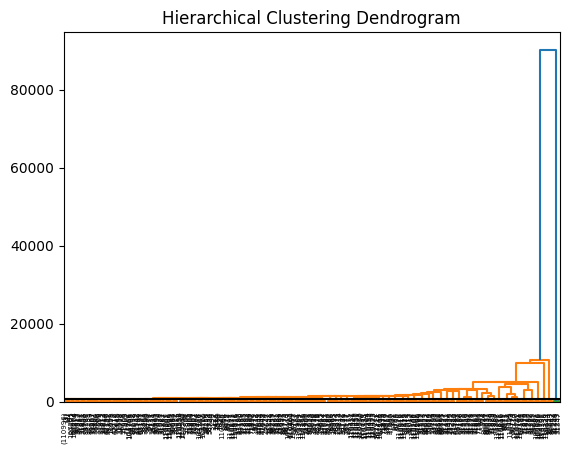

In [12]:
plot_dendrogram(data_mv, 'single', cut_line = 800)

In [13]:
data_mv['no_single6'] = AgglomerativeClustering(
    linkage = 'single', n_clusters = 7
    ).fit_predict(data_mv)

C:\Users\ritaf\AppData\Local\Temp\ipykernel_17588\2964097793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mv['no_single6'] = AgglomerativeClustering(


In [14]:
data_mv

,Frequency_items,Potencial_Score,Longevity_months,Credit_factor,Relevance_criteria,Recency_in_weeks,Flaged,Promotional_percentage,Beer,Bottled_Water,...,Fresh_Foods,Frozen_Foods,Fruit_Beverages,Pastry,Sodas,Toiletries,Veggies,Wines,Spent_Sum,no_single6
0,38,-0.40,23.0,0.7,1.0,15,0.0,20.0,75,38,...,148,150.0,105,27,24,27,10,0,778.0,2
1,50,-0.30,24.0,0.7,1.0,10,0.0,36.0,46,58,...,134,26.0,20,31,0,2,18,2,448.0,2
2,48,1.60,32.0,0.7,1.0,20,0.0,0.0,39,57,...,39,0.0,25,32,17,33,26,0,374.0,2
4,31,31.61,10.0,0.7,1.0,12,0.0,10.0,43,46,...,0,57.0,27,45,46,19,23,9,418.0,2
5,25,23.89,22.0,1.0,1.0,15,0.0,0.0,55,42,...,29,15.0,22,33,59,9,34,48,473.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123677,28,79.15,4.0,0.0,1.0,18,0.0,0.0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,2
123678,33,79.60,21.0,0.7,1.0,19,0.0,0.0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,2
123680,43,79.17,11.0,0.7,1.0,14,0.0,30.0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,2
123681,75,33.31,31.0,0.7,1.0,21,0.0,0.0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,2


In [15]:
def groupby_mean(data, variable, n_features=30):
    """
    Group the data by a variable and calculate the mean for each group.

    Args:
        data (pandas.DataFrame): The input data.
        variable (str): The variable used for grouping.
        n_features (int, optional): The number of features to include in the result. Defaults to 30.

    Returns:
        pandas.DataFrame: The transposed DataFrame containing the mean values for each group.
    """
    # Group the data by the specified variable and calculate the mean for each group
    grouped_data = data.groupby(variable).mean()

    # Select the first n_features + 1 columns (including the variable column) and transpose the DataFrame
    result = grouped_data.iloc[:, :n_features + 1].T

    # Return the transposed DataFrame
    return result

In [16]:
groupby_mean(data_mv, 'no_single6')

no_single6,0,1,2,3,4,5,6
Frequency_items,36.200000,46.00,38.323828,26.75,12.25,32.500,42.7500
Potencial_Score,64.169333,78.65,30.207465,79.97,-0.10,78.425,0.8875
Longevity_months,15.200000,7.75,15.114126,20.00,24.75,17.250,16.7500
Credit_factor,0.593333,0.00,0.891578,0.70,0.70,0.000,0.8500
Relevance_criteria,0.733333,0.00,0.952252,1.00,0.00,0.000,0.5000
Recency_in_weeks,8.066667,8.00,15.242190,6.00,5.00,6.500,5.2500
Flaged,0.266667,1.00,0.010739,0.00,0.00,1.000,0.5000
Promotional_percentage,111.920000,0.00,14.574976,0.00,0.00,0.000,24.0000
Beer,739.866667,414.75,59.284438,83.75,9586.50,900.250,317.0000
Bottled_Water,113.600000,50.25,57.516922,54.50,511.50,61.500,81.5000
